# Imports

In [34]:
import sys
import numpy as np

In [35]:
from src.convolution import step_function, step_functions, function_norm, convolution_integrand, convolution
from src.spectrum import Spectrum, from_str, from_csv, SpectrumValueType
from src.paths import project_dir

In [36]:
# plotting
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt

In [37]:
!python -V

Python 3.9.8


# Step function

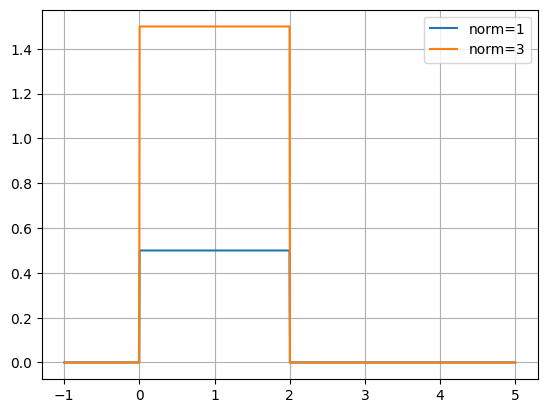

In [38]:
xvalues = np.linspace(start=-1, stop=5, num=1000)
xvalues_for_integration = step_functions(xvalues)
fig, ax = plt.subplots()
ax.plot(xvalues, step_functions(xvalues), label="norm=1")
ax.plot(xvalues, step_functions(xvalues, norm=3), label="norm=3")
ax.grid();
ax.legend();

## Norm

In [39]:
function_norm(step_function, lower_limit=-1, upper_limit=3)

1.0

In [40]:
function_norm(step_function, lower_limit=-1, upper_limit=3, args=(5,))

5.0

## Convolution

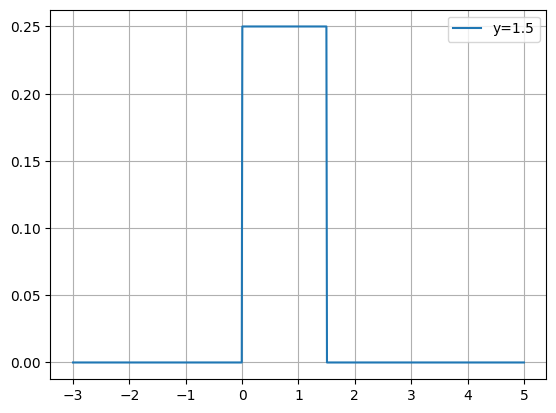

In [41]:
y = 1.5
t_values = np.linspace(start=-3, stop=5, num=800)
integrand_values_for_given_y = np.array([convolution_integrand(step_function)(t=t, y=y) for t in t_values])
fig, ax = plt.subplots()
ax.plot(t_values, integrand_values_for_given_y, label=f"y={y}")
ax.grid();
ax.legend();

In [42]:
convolution_integrand(step_function)(t=0, y=0, kwargs={'norm': 5, 'lower': -0.5, 'upper': 0.5})

25.0

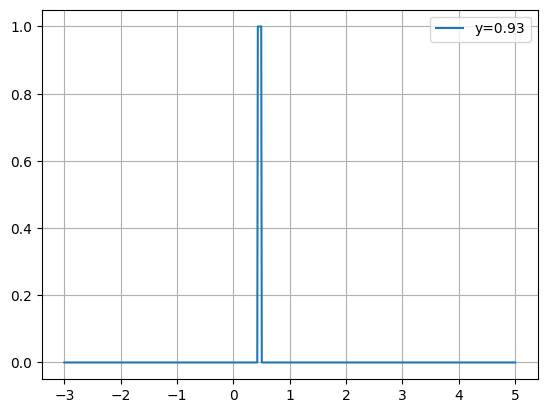

In [43]:
y = 0.93
t_values = np.linspace(start=-3, stop=5, num=800)
integrand_values_for_given_y = np.array([convolution_integrand(step_function)(t=t, y=y, kwargs={'norm': 1, 'lower': -0.5, 'upper': 0.5}) for t in t_values])
fig, ax = plt.subplots()
ax.plot(t_values, integrand_values_for_given_y, label=f"y={y}")
ax.grid();
ax.legend();

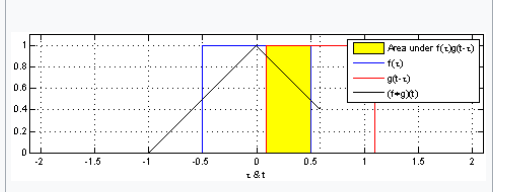
From https://en.wikipedia.org/wiki/Convolution

### On a road to proper integration procedure

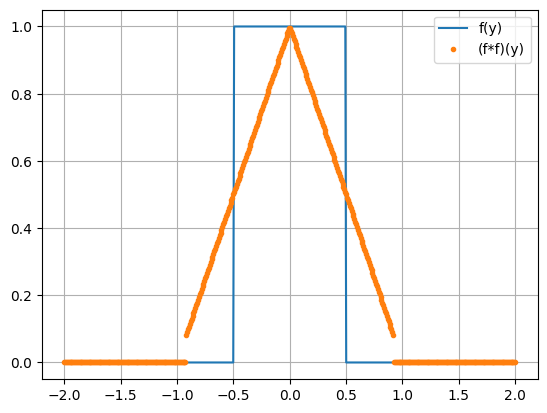

In [44]:
# plotting limits
y_values = np.linspace(start=-2, stop=2, num=500)
# default integration settings, we are not convering
step_function_args = (1,-0.5,0.5,0)
convolution_integration_limits = (-np.inf, np.inf)
integral_kwargs = {}
convolution_values = np.array([convolution(step_function,lower_limit=convolution_integration_limits[0], upper_limit=convolution_integration_limits[1], kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.grid();
ax.legend();

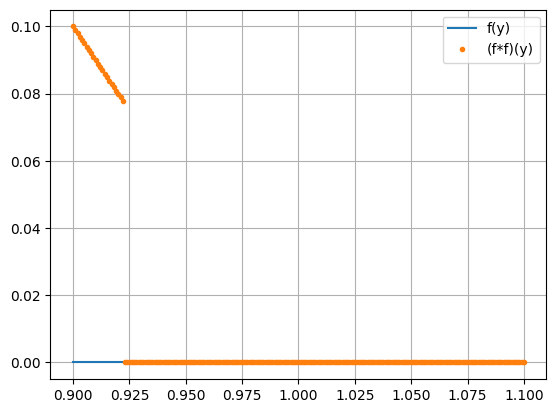

In [45]:
# plotting limits, lets zoom
y_values = np.linspace(start=0.9, stop=1.1, num=200)
# default integration settings, we are not convering
step_function_args = (1,-0.5,0.5,0)
convolution_integration_limits = (-np.inf, np.inf)
integral_kwargs = {}
convolution_values = np.array([convolution(step_function,lower_limit=convolution_integration_limits[0], upper_limit=convolution_integration_limits[1], kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.grid();
ax.legend();

In [46]:
# lets investigate one point
y = 0.95
step_function_args = (1,-0.5,0.5,0)
c, abserr = convolution(step_function, kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)
c, abserr

(0.0, 0.0)

In [47]:
# lets investigate one point, now with some tricks
y = 0.95

# replace zero with sys.float_info.min
step_function_args = (1,-0.5,0.5,sys.float_info.min) 

# add more points to the integral covering the expected domain
expected_conv_domain = (-1,1)
integral_kwargs = {'limit': 2000, 'points': np.linspace(*expected_conv_domain,100)}

# integrate the step function over explicit domain
convolution_integration_limits = (-100,100)

c, abserr = convolution(
    step_function, 
    lower_limit=convolution_integration_limits[0],
    upper_limit=convolution_integration_limits[1],
    kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)
c, abserr

(0.050000000000000086, 5.551115123125793e-17)

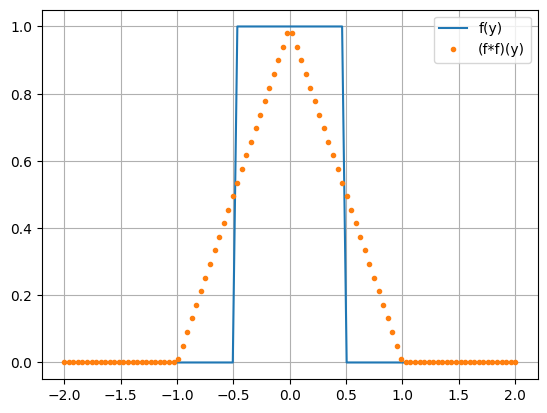

In [48]:
# plotting limits
y_values = np.linspace(start=-2, stop=2, num=100)
# tricks needed to make the integral converge
step_function_args = (1,-0.5,0.5,sys.float_info.min)
expected_conv_domain = (-1,1)
convolution_integration_limits = (-100,100)
integral_kwargs = {'limit': 2000, 'points': np.linspace(*expected_conv_domain,100)}
convolution_values = np.array([convolution(
    step_function,
    lower_limit=convolution_integration_limits[0], 
    upper_limit=convolution_integration_limits[1], 
    kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.grid();
ax.legend();

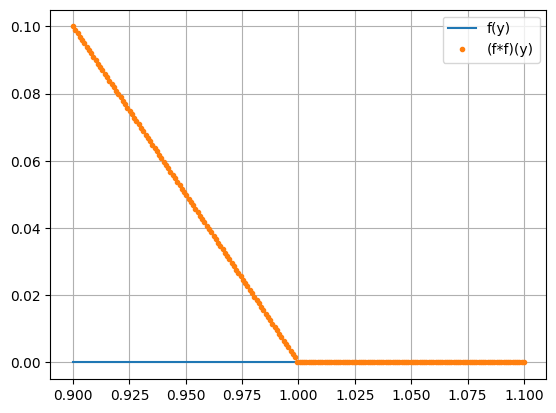

In [49]:
# and a zoom
y_values = np.linspace(start=0.9, stop=1.1, num=200)
# tricks needed to make the integral converge
step_function_args = (1,-0.5,0.5,sys.float_info.min)
expected_conv_domain = (-1,1)
convolution_integration_limits = (-100,100)
integral_kwargs = {'limit': 2000, 'points': np.linspace(*expected_conv_domain,100)}
convolution_values = np.array([convolution(
    step_function,
    lower_limit=convolution_integration_limits[0], 
    upper_limit=convolution_integration_limits[1], 
    kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.grid();
ax.legend();

### TODO
one could think of calculating of interval limits bases on function domain

### Checking first moments

f1_1st_moment=1.00, f2_1st_moment=2.00


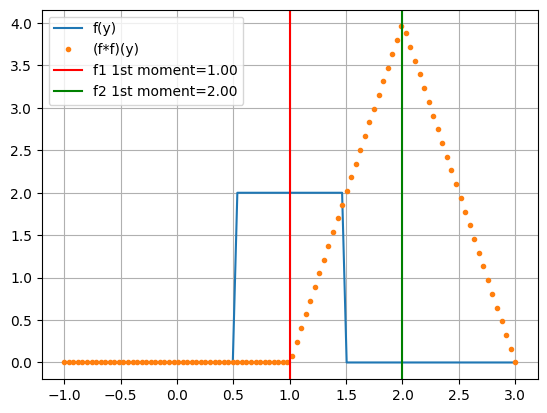

In [63]:
# plotting limits
y_values = np.linspace(start=-1, stop=3, num=100)
# tricks needed to make the integral converge
step_function_args = (2,0.5,1.5,sys.float_info.min)
expected_conv_domain = (0,4)
convolution_integration_limits = (0,2)
integral_kwargs = {'limit': 2000, 'points': np.linspace(*expected_conv_domain,100)}
convolution_values = np.array([convolution(
    step_function,
    lower_limit=convolution_integration_limits[0], 
    upper_limit=convolution_integration_limits[1], 
    kwargs=integral_kwargs)(y=y, integrand_args=step_function_args)[0] for y in y_values])

from src.helpers import first_moment
f1_1st_moment = first_moment(bin_centers=y_values, bin_values=step_functions(y_values, *step_function_args))
f2_1st_moment = first_moment(bin_centers=y_values, bin_values=convolution_values)
print(f"f1_1st_moment={f1_1st_moment:2.2f}, f2_1st_moment={f2_1st_moment:2.2f}")

#plotting
fig, ax = plt.subplots()
ax.plot(y_values, step_functions(y_values, *step_function_args), label="f(y)")
ax.plot(y_values, convolution_values, '.', label="(f*f)(y)")
ax.axvline(f1_1st_moment, color='r', label=f"f1 1st moment={f1_1st_moment:2.2f}")
ax.axvline(f2_1st_moment, color='g', label=f"f2 1st moment={f2_1st_moment:2.2f}")
ax.grid();
ax.legend();


# Spectrum

## Data

In [74]:
spectrum = from_csv(project_dir / 'data' / 'interim' / 'data.csv', delimiter=',', value_type=SpectrumValueType.yfy)
spectrum.norm

0.9938634018608192

In [75]:
spectrum.yfy.min(), spectrum.yfy.max()

(-0.0008956877263814889, 0.4982137261046694)

In [76]:
spectrum.yfy.clip(min=0).min(), spectrum.yfy.clip(min=0).max()

(0.0, 0.4982137261046694)

In [77]:
spectrum_clipped = Spectrum(bin_centers=spectrum.bin_centers, bin_values_yfy=spectrum.yfy.clip(min=0))
spectrum_clipped.yfy.min(), spectrum_clipped.yfy.max()

(0.0, 0.4982137261046694)

In [84]:
xvalues = np.geomspace(start=spectrum_clipped.bin_edges[0]/2, stop=spectrum_clipped.bin_edges[-1]*2, num=1000)
values_fy = spectrum_clipped.bin_values(xvalues, spectrum_value_type=SpectrumValueType.fy)
values_yfy = spectrum_clipped.bin_values(xvalues, spectrum_value_type=SpectrumValueType.yfy)
values_ydy = spectrum_clipped.bin_values(xvalues, spectrum_value_type=SpectrumValueType.ydy)

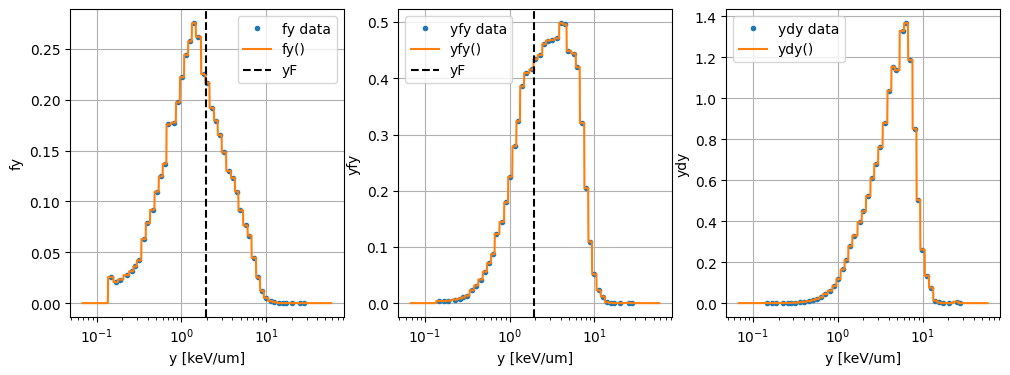

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].plot(spectrum_clipped.y, spectrum_clipped.fy, '.', label='fy data')
ax[0].plot(xvalues, values_fy, label='fy()')
ax[0].axvline(spectrum_clipped.yF, color='k', linestyle='--', label='yF')
ax[0].set_ylabel('fy')
ax[1].plot(spectrum_clipped.y, spectrum_clipped.yfy, '.', label='yfy data')
ax[1].plot(xvalues, values_yfy, label='yfy()')
ax[1].axvline(spectrum_clipped.yF, color='k', linestyle='--', label='yF')
ax[1].set_ylabel('yfy')
ax[2].plot(spectrum_clipped.y, spectrum_clipped.ydy, '.', label='ydy data')
ax[2].plot(xvalues, values_ydy, label='ydy()')
ax[2].set_ylabel('ydy')
for a in ax:
    a.set_xscale('log')
    #a.set_yscale('log')
    a.grid()
    a.set_xlabel('y [keV/um]')
    a.legend()
    #a.set_xlim(0, 20)

## Normalization

In [86]:
pdf_function = lambda x : spectrum_clipped.bin_value(x, spectrum_value_type=SpectrumValueType.fy) 
function_norm(pdf_function, lower_limit=spectrum_clipped.bin_edges[0], upper_limit=spectrum_clipped.bin_edges[-1])

0.9870827697855141

In [87]:
pdf_function = lambda x : spectrum_clipped.bin_value(x, spectrum_value_type=SpectrumValueType.fy) 
function_norm(pdf_function)

0.9937516998520008

In [88]:
function_norm(spectrum_clipped.bin_value, args=(SpectrumValueType.fy,))

0.9937516998520008

## Folding

### Single values

In [114]:
f1_function = lambda x : spectrum_clipped.bin_value(x, spectrum_value_type=SpectrumValueType.fy) 
f1_function(2)

0.21672449170916908

In [115]:
convolution(
    f1_function,
    lower_limit=convolution_integration_limits[0], 
    upper_limit=convolution_integration_limits[1], 
    kwargs=integral_kwargs)(4)

(0.05999045341048553, 1.4630994339681624e-08)

### Domain and plotting

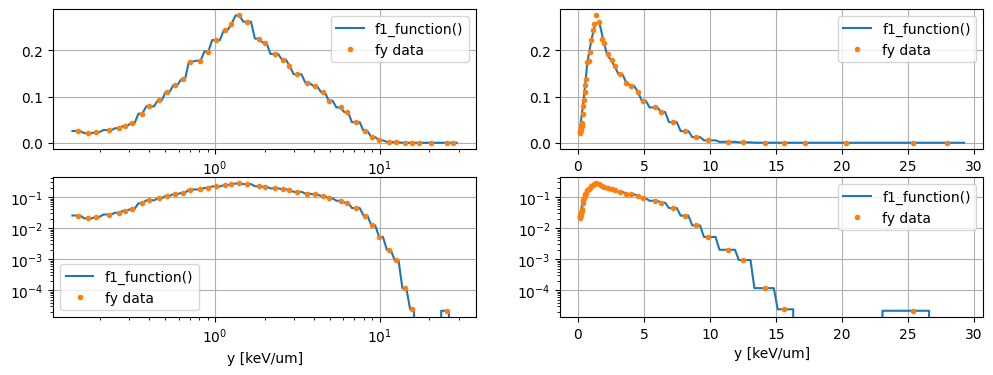

In [111]:
xvalues_geom = np.geomspace(start=spectrum_clipped.bin_edges[0], stop=spectrum_clipped.bin_edges[-1], num=100)
xvalues_lin = np.linspace(start=spectrum_clipped.bin_edges[0], stop=spectrum_clipped.bin_edges[-1], num=100)
yvalues_geom = f1_function(xvalues_geom)
yvalues_lin = f1_function(xvalues_lin)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))
ax[0][0].plot(xvalues_geom, yvalues_geom, label='f1_function()')
ax[0][0].set_xscale('log')
ax[0][1].plot(xvalues_lin, yvalues_lin, label='f1_function()')
ax[1][0].plot(xvalues_geom, yvalues_geom, label='f1_function()')
ax[1][0].set_xscale('log')
ax[1][0].set_yscale('log')
ax[1][1].plot(xvalues_lin, yvalues_lin, label='f1_function()')
ax[1][1].set_yscale('log')
for a in ax.flatten():
    a.plot(spectrum_clipped.y, spectrum_clipped.fy, '.', label='fy data')
    a.grid()
    a.set_xlabel('y [keV/um]')
    a.legend()

In [123]:
expected_conv_domain = (spectrum_clipped.bin_edges[0]*2,spectrum_clipped.bin_edges[-1]*2)
xvalues_for_integration = np.geomspace(start=expected_conv_domain[0], stop=expected_conv_domain[1], num=50)

convolution_integration_limits = (spectrum_clipped.bin_edges[0],spectrum_clipped.bin_edges[-1])
integral_kwargs = {'limit': 500, 'points': np.geomspace(*convolution_integration_limits,200)}
#integral_kwargs = {}
f2_values = [convolution(
    f1_function,
    lower_limit=convolution_integration_limits[0], 
    upper_limit=convolution_integration_limits[1], 
    kwargs=integral_kwargs)(y) for y in xvalues_for_integration]
f2_values

[(0.0, 0.0),
 (1.8238190020174844e-05, 8.762938262077273e-09),
 (3.6089583610720324e-05, 5.627816411262127e-09),
 (6.431516335789581e-05, 4.304489720270851e-09),
 (0.00010810265171486932, 4.57009811270163e-09),
 (0.00017516141538950284, 1.3560580008371978e-08),
 (0.00031664631200920647, 1.436210424107234e-08),
 (0.0005450050203246213, 8.551053373414066e-09),
 (0.000902290520119, 1.0089167894688188e-08),
 (0.0014690086381818652, 1.2868422219957862e-08),
 (0.002359108559151497, 9.426529731272615e-09),
 (0.0037713550667205307, 8.43223592165987e-09),
 (0.005788819640202261, 1.6565418054642622e-08),
 (0.008776177329470378, 6.965240555503738e-08),
 (0.012940249133473244, 8.046434507927303e-08),
 (0.0187292628489551, 8.721333332460317e-07),
 (0.026570861330617774, 1.839366052421021e-07),
 (0.036838779959044166, 3.607390577156644e-07),
 (0.04936672978045964, 3.2175810676937644e-07),
 (0.0633276000835065, 2.6335137187916136e-06),
 (0.07763669060852658, 2.3953283864591723e-06),
 (0.0911527215235

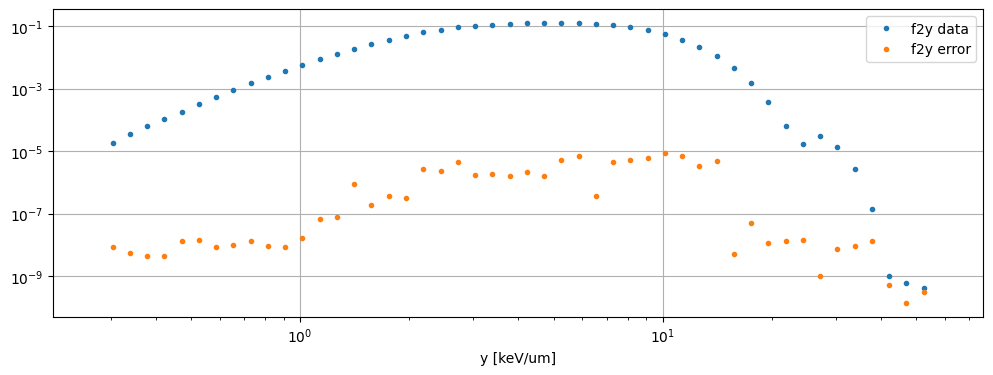

In [124]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
ax.plot(xvalues_for_integration, [item[0] for item in f2_values], '.', label='f2y data')
ax.plot(xvalues_for_integration, [item[1] for item in f2_values], '.', label='f2y error')
ax.grid()
ax.set_xlabel('y [keV/um]')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')

In [31]:
# step_function_args = (), #(sys.float_info.min)
# expected_conv_domain = (-spectrum.bin_edges[0] / 10,spectrum.bin_edges[-1] * 10)
# convolution_integration_limits = (-spectrum.bin_edges[0] / 10,spectrum.bin_edges[-1] * 10)
# integral_kwargs = {'limit': 2000, 'points': np.geomspace(*expected_conv_domain,100)}
# f1_function = lambda x : spectrum.bin_value(x, spectrum_value_type=SpectrumValueType.fy) 
# convolution_values = np.array([convolution(
#     f1_function,
#     lower_limit=convolution_integration_limits[0], 
#     upper_limit=convolution_integration_limits[1], 
#     kwargs=integral_kwargs)(y=y)[0] for y in y_values])

In [125]:
f2_spectrum = Spectrum(bin_centers=xvalues_for_integration, bin_values_fy=np.array([item[0] for item in f2_values]))

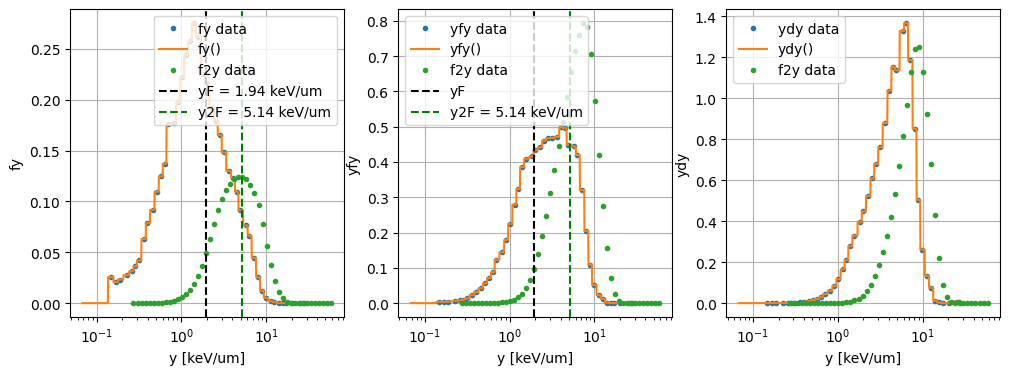

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax[0].plot(spectrum_clipped.y, spectrum_clipped.fy, '.', label='fy data')
ax[0].plot(xvalues, values_fy, label='fy()')
ax[0].plot(f2_spectrum.y, f2_spectrum.fy, '.', label='f2y data')
ax[0].axvline(spectrum_clipped.yF, color='k', linestyle='--', label=f'yF = {spectrum_clipped.yF:.2f} keV/um')
ax[0].axvline(f2_spectrum.yF, color='g', linestyle='--', label=f'y2F = {f2_spectrum.yF:.2f} keV/um')
ax[0].set_ylabel('fy')
ax[1].plot(spectrum_clipped.y, spectrum_clipped.yfy, '.', label='yfy data')
ax[1].plot(xvalues, values_yfy, label='yfy()')
ax[1].plot(f2_spectrum.y, f2_spectrum.yfy, '.', label='f2y data')
ax[1].axvline(spectrum_clipped.yF, color='k', linestyle='--', label='yF')
ax[1].axvline(f2_spectrum.yF, color='g', linestyle='--', label=f'y2F = {f2_spectrum.yF:.2f} keV/um')
ax[1].set_ylabel('yfy')
ax[2].plot(spectrum_clipped.y, spectrum_clipped.ydy, '.', label='ydy data')
ax[2].plot(xvalues, values_ydy, label='ydy()')
ax[2].plot(f2_spectrum.y, f2_spectrum.ydy, '.', label='f2y data')
ax[2].set_ylabel('ydy')
for a in ax:
    a.set_xscale('log')
    #a.set_yscale('log')
    a.grid()
    a.set_xlabel('y [keV/um]')
    a.legend()
    #a.set_xlim(0, 20)